In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from google.colab import files
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adadelta, Adam


#Загрузка данных

*Разбор данного раздела:* https://youtu.be/Hm41rb1zqQo?t=7582

In [4]:
#Загружаем файлы
files.upload()
!ls #Выводим содержимое корневой папки

Saving cars_new for Python.csv to cars_new for Python.csv
'cars_new for Python.csv'   sample_data


In [5]:
#Считываем csv с помощью pandas
cars = pd.read_csv('cars_new for Python.csv', sep=',')
cars[:5] #Выводим первые 5 машин 

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0


In [6]:
print(cars.values.shape)

(70119, 10)


In [0]:
#Создаём словарь поле - его индекс
def create_dict(s):
  ret = {} #Создаём пустой словарь
  for _id, name in enumerate(s): #Проходим по всем парам - id и название
    ret.update({name: _id}) #Добавляем в словарь
  return ret

#ФУнкция преобразования в one hot encoding
def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr

In [0]:
#Создаём словари по всем текстовым колонкам
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

#Запоминаем цены
prices = np.array(cars['price'], dtype=np.float)

#Запоминаем числовые параметры
#И нормируем
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

In [9]:
print(marks_dict)

{'subaru': 0, 'honda': 1, 'toyota': 2, 'opel': 3, 'nissan': 4, 'mazda': 5, 'peugeot': 6, 'suzuki': 7, 'bmw': 8, 'renault': 9, 'skoda': 10, 'mitsubishi': 11, 'hyundai': 12, 'ford': 13, 'kia': 14, 'chevrolet': 15, 'chery': 16, 'audi': 17, 'volkswagen': 18, 'mercedes-benz': 19, 'daewoo': 20}


0 Создаем полную базу данных.

In [0]:
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  #Добавляем текущую строку в общий z_train
  x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)
#Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

In [11]:
#Выводим один x_train
print(x_train[0,:20])
print(x_train[0,-20:])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          1.          0.          0.          1.5200145  -1.40018212
  0.12288486  0.22905575]


#Нейронка

*Разбор данного раздела:* https://youtu.be/Hm41rb1zqQo?t=8166

Train on 60000 samples, validate on 10119 samples
Epoch 1/30
60000/60000 [==============================] - 21s 346us/sample - loss: 0.5056 - val_loss: 0.4603
Epoch 2/30
60000/60000 [==============================] - 19s 316us/sample - loss: 0.2936 - val_loss: 0.3739
Epoch 3/30
60000/60000 [==============================] - 19s 320us/sample - loss: 0.2498 - val_loss: 0.3397
Epoch 4/30
60000/60000 [==============================] - 19s 317us/sample - loss: 0.2257 - val_loss: 0.3158
Epoch 5/30
60000/60000 [==============================] - 19s 321us/sample - loss: 0.2102 - val_loss: 0.2990
Epoch 6/30
60000/60000 [==============================] - 19s 313us/sample - loss: 0.1989 - val_loss: 0.2884
Epoch 7/30
60000/60000 [==============================] - 19s 317us/sample - loss: 0.1898 - val_loss: 0.2761
Epoch 8/30
60000/60000 [==============================] - 19s 312us/sample - loss: 0.1829 - val_loss: 0.2691
Epoch 9/30
60000/60000 [==============================] - 19s 316us/sample - l

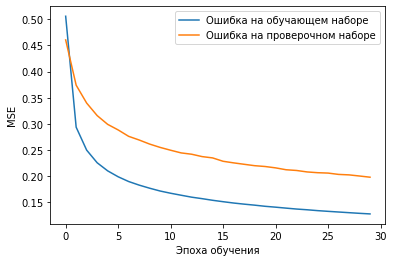

Средняя ошибка:  80030.0
Средняя цена:  530277.0
Процент ошибки: 15.0%


In [25]:
#Создаём сеть
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

1.1 создаем базу данных
, **марки и модели** машин не включаем.

In [0]:
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr =  to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  #Добавляем текущую строку в общий z_train
  x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

In [0]:
#Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10119 samples
Epoch 1/20
60000/60000 [==============================] - 179s 3ms/sample - loss: 0.4923 - val_loss: 0.4638
Epoch 2/20
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.3062 - val_loss: 0.3909
Epoch 3/20
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.2678 - val_loss: 0.3604
Epoch 4/20
60000/60000 [==============================] - 176s 3ms/sample - loss: 0.2471 - val_loss: 0.3412
Epoch 5/20
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.2331 - val_loss: 0.3250
Epoch 6/20
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.2232 - val_loss: 0.3149
Epoch 7/20
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.2153 - val_loss: 0.3051
Epoch 8/20
60000/60000 [==============================] - 176s 3ms/sample - loss: 0.2084 - val_loss: 0.2989
Epoch

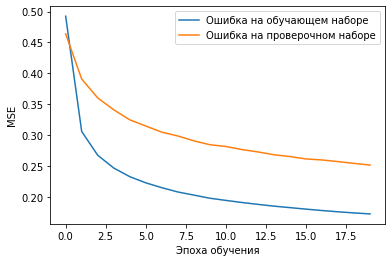

Средняя ошибка:  107160.0
Средняя цена:  530277.0
Процент ошибки: 20.0%


In [0]:
#Создаём сеть
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=20, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

Train on 60000 samples, validate on 10119 samples
Epoch 1/10
60000/60000 - 18s - loss: 0.1266 - val_loss: 0.1980
Epoch 2/10
60000/60000 - 17s - loss: 0.1257 - val_loss: 0.1968
Epoch 3/10
60000/60000 - 18s - loss: 0.1244 - val_loss: 0.1966
Epoch 4/10
60000/60000 - 18s - loss: 0.1237 - val_loss: 0.1951
Epoch 5/10
60000/60000 - 18s - loss: 0.1228 - val_loss: 0.1925
Epoch 6/10
60000/60000 - 18s - loss: 0.1219 - val_loss: 0.1912
Epoch 7/10
60000/60000 - 18s - loss: 0.1208 - val_loss: 0.1912
Epoch 8/10
60000/60000 - 18s - loss: 0.1201 - val_loss: 0.1892
Epoch 9/10
60000/60000 - 18s - loss: 0.1190 - val_loss: 0.1872
Epoch 10/10
60000/60000 - 17s - loss: 0.1185 - val_loss: 0.1869


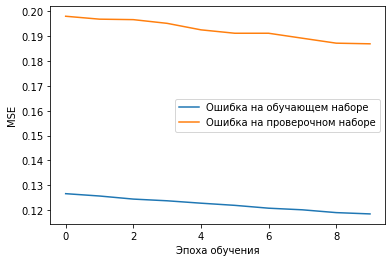

Средняя ошибка:  77820.0
Средняя цена:  530277.0
Процент ошибки: 15.0%


In [26]:
#УДообчаем эту сетку еще 10 эпох.
model.compile(optimizer=Adam(lr=0.000001), loss='mse')
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=10, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=2)

plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

predict = model.predict(x_train[n_val:])
predict = y_scaler.inverse_transform(predict).flatten()
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**1.2** создаем базу данных без учета **модели** автомобиля.

In [0]:
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  #Добавляем текущую строку в общий z_train
  x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)
#Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

Train on 60000 samples, validate on 10119 samples
Epoch 1/30
60000/60000 [==============================] - 20s 335us/sample - loss: 0.4609 - val_loss: 0.4393
Epoch 2/30
60000/60000 [==============================] - 19s 314us/sample - loss: 0.2861 - val_loss: 0.3687
Epoch 3/30
60000/60000 [==============================] - 19s 317us/sample - loss: 0.2451 - val_loss: 0.3381
Epoch 4/30
60000/60000 [==============================] - 19s 314us/sample - loss: 0.2234 - val_loss: 0.3150
Epoch 5/30
60000/60000 [==============================] - 19s 317us/sample - loss: 0.2080 - val_loss: 0.2971
Epoch 6/30
60000/60000 [==============================] - 19s 315us/sample - loss: 0.1964 - val_loss: 0.2842
Epoch 7/30
60000/60000 [==============================] - 19s 317us/sample - loss: 0.1874 - val_loss: 0.2762
Epoch 8/30
60000/60000 [==============================] - 19s 313us/sample - loss: 0.1804 - val_loss: 0.2669
Epoch 9/30
60000/60000 [==============================] - 19s 315us/sample - l

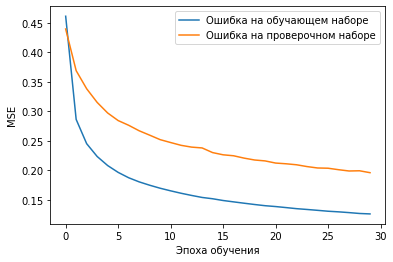

Средняя ошибка:  79756.0
Средняя цена:  530277.0
Процент ошибки: 15.0%


In [28]:
#Создаём сеть без "модели"
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**1.3** Создаем базу без учета типа **кузова** автомобиля.

In [0]:
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  #Добавляем текущую строку в общий z_train
  x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)
#Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10119 samples
Epoch 1/30
60000/60000 [==============================] - 39s 650us/sample - loss: 0.5335 - val_loss: 0.4897
Epoch 2/30
60000/60000 [==============================] - 30s 493us/sample - loss: 0.3194 - val_loss: 0.3971
Epoch 3/30
60000/60000 [==============================] - 30s 494us/sample - loss: 0.2677 - val_loss: 0.3562
Epoch 4/30
60000/60000 [==============================] - 30s 496us/sample - loss: 0.2403 - val_loss: 0.3311
Epoch 5/30
60000/60000 [==============================] - 30s 493us/sample - loss: 0.2217 - val_loss: 0.3129
Epoch 6/30
60000/60000 [==============================] - 29s 489us/sample - loss: 0.2079 - val_loss: 0.2966
Epoch 7/30
60000/60000 [==============================] - 29s 490us/sample - loss: 0.1967 - val_loss: 0.2842
Epoch 8/30
60000/60000 [==============================] - 29s 490us/sample - loss: 0.1875 - val_loss: 0.27

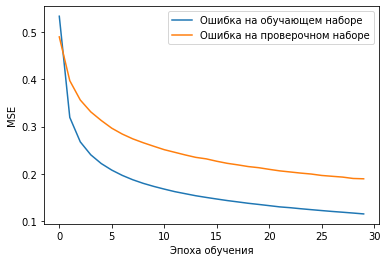

Средняя ошибка:  73308.0
Средняя цена:  530277.0
Процент ошибки: 14.0%


In [11]:
#Создаём сеть без "кузова"
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**1.4** Создаем базу без учета типа **КПП** автомобиля.

In [0]:
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  #Добавляем текущую строку в общий z_train
  x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)
#Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

Train on 60000 samples, validate on 10119 samples
Epoch 1/20
60000/60000 [==============================] - 30s 504us/sample - loss: 0.5336 - val_loss: 0.4943
Epoch 2/20
60000/60000 [==============================] - 29s 491us/sample - loss: 0.3157 - val_loss: 0.3930
Epoch 3/20
60000/60000 [==============================] - 29s 489us/sample - loss: 0.2596 - val_loss: 0.3494
Epoch 4/20
60000/60000 [==============================] - 29s 489us/sample - loss: 0.2314 - val_loss: 0.3238
Epoch 5/20
60000/60000 [==============================] - 29s 490us/sample - loss: 0.2131 - val_loss: 0.3059
Epoch 6/20
60000/60000 [==============================] - 29s 489us/sample - loss: 0.1992 - val_loss: 0.2905
Epoch 7/20
60000/60000 [==============================] - 30s 492us/sample - loss: 0.1882 - val_loss: 0.2784
Epoch 8/20
60000/60000 [==============================] - 29s 490us/sample - loss: 0.1793 - val_loss: 0.2683
Epoch 9/20
60000/60000 [==============================] - 29s 489us/sample - l

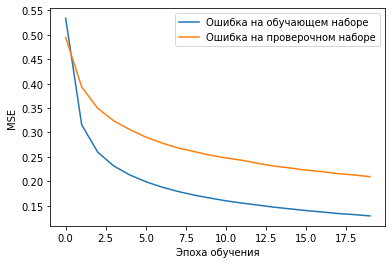

Средняя ошибка:  77411.0
Средняя цена:  530277.0
Процент ошибки: 15.0%


In [13]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=20, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

In [0]:
#УДообчаем эту сетку еще 10 эпох.
model.compile(optimizer=Adam(lr=0.000001), loss='mse')
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=10, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=2)

plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

predict = model.predict(x_train[n_val:])
predict = y_scaler.inverse_transform(predict).flatten()
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**1.5** Создаем базу без учета типа **топлива** автомобиля.

In [0]:
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  #Добавляем текущую строку в общий z_train
  x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)
#Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

Train on 60000 samples, validate on 10119 samples
Epoch 1/20
60000/60000 [==============================] - 30s 503us/sample - loss: 0.5601 - val_loss: 0.5179
Epoch 2/20
60000/60000 [==============================] - 29s 489us/sample - loss: 0.3382 - val_loss: 0.4163
Epoch 3/20
60000/60000 [==============================] - 29s 487us/sample - loss: 0.2798 - val_loss: 0.3707
Epoch 4/20
60000/60000 [==============================] - 29s 487us/sample - loss: 0.2492 - val_loss: 0.3419
Epoch 5/20
60000/60000 [==============================] - 29s 489us/sample - loss: 0.2281 - val_loss: 0.3223
Epoch 6/20
60000/60000 [==============================] - 29s 485us/sample - loss: 0.2128 - val_loss: 0.3042
Epoch 7/20
60000/60000 [==============================] - 29s 484us/sample - loss: 0.1999 - val_loss: 0.2906
Epoch 8/20
60000/60000 [==============================] - 29s 487us/sample - loss: 0.1894 - val_loss: 0.2798
Epoch 9/20
60000/60000 [==============================] - 29s 484us/sample - l

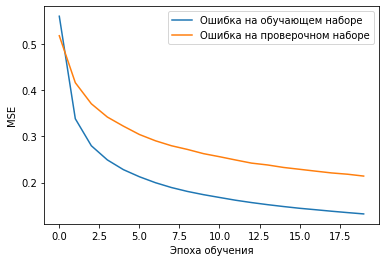

Средняя ошибка:  78309.0
Средняя цена:  530277.0
Процент ошибки: 15.0%


In [15]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=20, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**1.6** Создаем базу без учета типа **обем двигателя** автомобиля.

In [0]:
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [powers[_id]]
  
  #Добавляем текущую строку в общий z_train
  x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)
#Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

Train on 60000 samples, validate on 10119 samples
Epoch 1/30
60000/60000 [==============================] - 31s 510us/sample - loss: 0.5386 - val_loss: 0.4915
Epoch 2/30
60000/60000 [==============================] - 30s 494us/sample - loss: 0.3140 - val_loss: 0.3890
Epoch 3/30
60000/60000 [==============================] - 30s 494us/sample - loss: 0.2587 - val_loss: 0.3468
Epoch 4/30
60000/60000 [==============================] - 30s 494us/sample - loss: 0.2311 - val_loss: 0.3216
Epoch 5/30
60000/60000 [==============================] - 30s 500us/sample - loss: 0.2129 - val_loss: 0.3031
Epoch 6/30
60000/60000 [==============================] - 30s 497us/sample - loss: 0.1989 - val_loss: 0.2875
Epoch 7/30
60000/60000 [==============================] - 30s 496us/sample - loss: 0.1879 - val_loss: 0.2752
Epoch 8/30
60000/60000 [==============================] - 30s 496us/sample - loss: 0.1790 - val_loss: 0.2655
Epoch 9/30
60000/60000 [==============================] - 30s 499us/sample - l

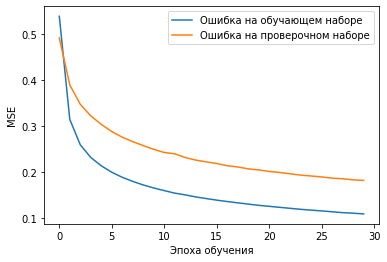

Средняя ошибка:  71429.0
Средняя цена:  530277.0
Процент ошибки: 13.0%


In [17]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**1.7** Создаем базу без учета типа **мощности двигателя** автомобиля.

In [0]:
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] 
  
  #Добавляем текущую строку в общий z_train
  x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)
#Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

Train on 60000 samples, validate on 10119 samples
Epoch 1/30
60000/60000 [==============================] - 30s 508us/sample - loss: 0.5900 - val_loss: 0.5451
Epoch 2/30
60000/60000 [==============================] - 30s 495us/sample - loss: 0.3538 - val_loss: 0.4333
Epoch 3/30
60000/60000 [==============================] - 30s 492us/sample - loss: 0.2916 - val_loss: 0.3864
Epoch 4/30
60000/60000 [==============================] - 29s 491us/sample - loss: 0.2598 - val_loss: 0.3569
Epoch 5/30
60000/60000 [==============================] - 29s 492us/sample - loss: 0.2377 - val_loss: 0.3332
Epoch 6/30
60000/60000 [==============================] - 30s 492us/sample - loss: 0.2216 - val_loss: 0.3175
Epoch 7/30
60000/60000 [==============================] - 30s 492us/sample - loss: 0.2088 - val_loss: 0.3035
Epoch 8/30
60000/60000 [==============================] - 30s 492us/sample - loss: 0.1979 - val_loss: 0.2907
Epoch 9/30
60000/60000 [==============================] - 30s 493us/sample - l

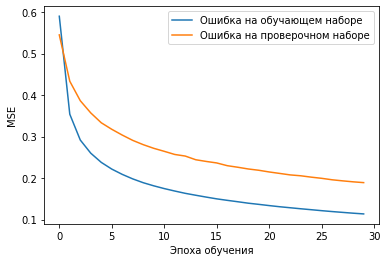

Средняя ошибка:  74789.0
Средняя цена:  530277.0
Процент ошибки: 14.0%


In [19]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни проценt ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**1.8** Создаем базу без учета **года выпуска** автомобиля.

In [0]:
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  #Добавляем текущую строку в общий z_train
  x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)
#Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

Train on 60000 samples, validate on 10119 samples
Epoch 1/30
60000/60000 [==============================] - 31s 516us/sample - loss: 0.6196 - val_loss: 0.5941
Epoch 2/30
60000/60000 [==============================] - 30s 496us/sample - loss: 0.4088 - val_loss: 0.4911
Epoch 3/30
60000/60000 [==============================] - 30s 493us/sample - loss: 0.3484 - val_loss: 0.4441
Epoch 4/30
60000/60000 [==============================] - 30s 495us/sample - loss: 0.3159 - val_loss: 0.4146
Epoch 5/30
60000/60000 [==============================] - 30s 493us/sample - loss: 0.2938 - val_loss: 0.3929
Epoch 6/30
60000/60000 [==============================] - 30s 495us/sample - loss: 0.2768 - val_loss: 0.3757
Epoch 7/30
60000/60000 [==============================] - 30s 493us/sample - loss: 0.2624 - val_loss: 0.3602
Epoch 8/30
60000/60000 [==============================] - 30s 493us/sample - loss: 0.2502 - val_loss: 0.3470
Epoch 9/30
60000/60000 [==============================] - 30s 495us/sample - l

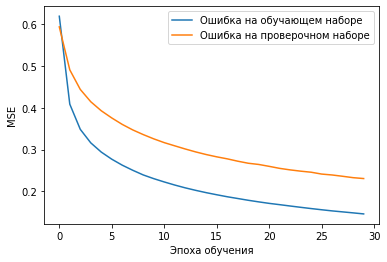

Средняя ошибка:  92010.0
Средняя цена:  530277.0
Процент ошибки: 17.0%


In [21]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**1.9** Создаем базу без учета **пробега**  автомобиля.

In [0]:
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  #Добавляем текущую строку в общий z_train
  x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)
#Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

Train on 60000 samples, validate on 10119 samples
Epoch 1/30
60000/60000 [==============================] - 31s 523us/sample - loss: 0.5537 - val_loss: 0.5355
Epoch 2/30
60000/60000 [==============================] - 30s 508us/sample - loss: 0.3520 - val_loss: 0.4357
Epoch 3/30
60000/60000 [==============================] - 30s 505us/sample - loss: 0.2912 - val_loss: 0.3893
Epoch 4/30
60000/60000 [==============================] - 30s 503us/sample - loss: 0.2597 - val_loss: 0.3607
Epoch 5/30
60000/60000 [==============================] - 30s 504us/sample - loss: 0.2385 - val_loss: 0.3407
Epoch 6/30
60000/60000 [==============================] - 30s 502us/sample - loss: 0.2231 - val_loss: 0.3246
Epoch 7/30
60000/60000 [==============================] - 30s 502us/sample - loss: 0.2105 - val_loss: 0.3113
Epoch 8/30
60000/60000 [==============================] - 30s 501us/sample - loss: 0.1998 - val_loss: 0.3029
Epoch 9/30
60000/60000 [==============================] - 30s 502us/sample - l

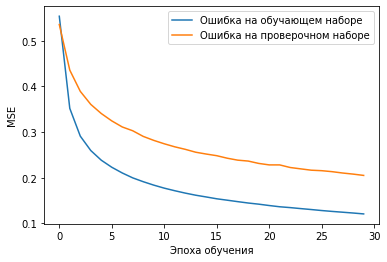

Средняя ошибка:  75799.0
Средняя цена:  530277.0
Процент ошибки: 14.0%


In [31]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**ВЫВОД**

**2** Отключаем нормализацию входных данных.

In [0]:
#Задаем числовые параметры без нормализации

years = cars['year']
mileages = cars['mileage']
volumes = cars['volume']
powers = cars['power']


In [0]:
# создаем базу данных
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  #Добавляем текущую строку в общий z_train
  x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)
#Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

Train on 60000 samples, validate on 10119 samples
Epoch 1/20
60000/60000 [==============================] - 32s 528us/sample - loss: 70.6158 - val_loss: 0.5214
Epoch 2/20
60000/60000 [==============================] - 31s 514us/sample - loss: 54.7611 - val_loss: 0.8674
Epoch 3/20
60000/60000 [==============================] - 31s 511us/sample - loss: 53.7500 - val_loss: 8.6676
Epoch 4/20
60000/60000 [==============================] - 31s 512us/sample - loss: 115.2824 - val_loss: 1.1292
Epoch 5/20
60000/60000 [==============================] - 31s 509us/sample - loss: 57.8233 - val_loss: 1.4854
Epoch 6/20
60000/60000 [==============================] - 31s 509us/sample - loss: 82.6127 - val_loss: 0.6920
Epoch 7/20
60000/60000 [==============================] - 31s 511us/sample - loss: 76.6918 - val_loss: 1.7281
Epoch 8/20
60000/60000 [==============================] - 31s 510us/sample - loss: 48.8012 - val_loss: 3.2763
Epoch 9/20
60000/60000 [==============================] - 31s 511us/s

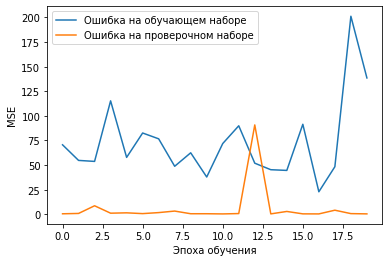

Средняя ошибка:  232646.0
Средняя цена:  530277.0
Процент ошибки: 44.0%


In [36]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=20, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")


**ВЫВОД** Нормализация входных данных необходима , сетка работает не стабильно.

**3** Проверяем влияние на ошибку, операции преобразования входных данных "года выпуска автомобиля" в формат +ohe.

In [0]:
#Запоминаем числовые параметры
#И нормируем
fuels_dict = create_dict(set(cars['year']))
kpps_dict = create_dict(set(cars['kpp']))

mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

In [45]:
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        to_ohe(car[3], years_dict) + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  #Добавляем текущую строку в общий z_train
   x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)
#Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

IndentationError: ignored

In [32]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

Train on 60000 samples, validate on 10119 samples
Epoch 1/30
60000/60000 [==============================] - 312s 5ms/sample - loss: 0.5507 - val_loss: 0.5121
Epoch 2/30
60000/60000 [==============================] - 312s 5ms/sample - loss: 0.3287 - val_loss: 0.4059
Epoch 3/30
60000/60000 [==============================] - 311s 5ms/sample - loss: 0.2691 - val_loss: 0.3593
Epoch 4/30
35800/60000 [================>.............] - ETA: 2:00 - loss: 0.2505

KeyboardInterrupt: ignored

**ВЫВОД**

**4**`**Архитектура сети НС**`.

In [0]:
# нормируем
years = preprocessing.scale(cars['year'])

In [47]:
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  #Добавляем текущую строку в общий z_train
  x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)
#Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

KeyError: ignored

**4.1** добавляем  слой Dropout в НС.

In [0]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.25))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**ВЫВОД**

**4.2** добавляем слой Batch Normalization.

In [0]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**ВЫВОД**

**4.3** меняем активационную функцию elu

In [0]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='elu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(2500, activation='elu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**ВЫВОД**

**4.4** меняем активационную функцию linear

In [0]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='linear', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(2500, activation='linear'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**ВЫВОД**

**4.5** меняем активационную функцию sigmoid

In [0]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='sigmoid', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(2500, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**ВЫВОД**

**4.6** меняем шаг обучения

In [0]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-3
model.compile(optimizer=Adam(lr=0.001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**ВЫВОД**

**4.7** меняем размер батча.

In [0]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=40,
                    epochs=20, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**ВЫВОД**

**4.8**  меняем число нейронов НС, увеличиваем.

In [0]:
#Создаём сеть 
model = Sequential()
model.add(Dense(4500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(3500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**ВЫВОД**

**4.9** меняем число нейронов НС, уменьшаем.

In [0]:
#Создаём сеть 
model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**ВЫВОД**

**4.11** меняем число слоев НС, уменьшаем.

In [0]:
#Создаём сеть 
model = Sequential()
model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**ВЫВОД**

**4.10** меняем число слоев НС, увеличиваем.

In [0]:
#Создаём сеть 
model = Sequential()
model.add(Dense(4500, activation='relu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(3500, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2500, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

#Указываем прямо шаг обучения - 1е-6
model.compile(optimizer=Adam(lr=0.000001), loss='mse')

#60000 примеров будет в обучающей выборке
n_val = 60000
history = model.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=20,
                    epochs=30, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

#Отображаем графики ошибки обучения на всех эпохах
#Один по обучающей выборке, второй по проверочной
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model.predict(x_train[n_val:])
#Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

#Считаем ошибку и модуль ошибки прогнозирования по всем примерам
delta = predict - y_train[n_val:]
abs_delta = abs(delta)

#Считаем среднюю цену, среднюю ошибку и средни процени ошибки
#Выводим на экран
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

**ВЫВОД**

#Вывод результатов

*Разбор данного раздела:* https://youtu.be/Hm41rb1zqQo?t=9144

**Выводим результаты таблицей**

In [0]:
#Выводим названия колонок
print('{:>10} {:>10} {:>10} {:>10}'.format('predict', 'y', 'error', 'error %'))

#Выводим 30 примеров
for i in range(30):
  price = predict[i] #Запоминаем предсказанную цену
  real_price = y_train[n_val+i] #Запоминаем реальзую цену
  #Выводим значения колонок
  print('{:>10.0f} {:>10.0f} {:>10.0f} {:>10.3f}'.format(price, real_price, abs(price - real_price), ((price / real_price) - 1) * 100))

   predict          y      error    error %
    120513     165000      44487    -26.962
    354320     415000      60680    -14.622
    546315     380000     166315     43.767
    865303     860000       5303      0.617
    224880     220000       4880      2.218
    475546     500000      24454     -4.891
    528614     650000     121386    -18.675
   1911545    1150000     761545     66.221
    743456     570000     173456     30.431
    522603     520000       2603      0.501
    315563     319000       3437     -1.078
    733219     760000      26781     -3.524
    215535     235000      19465     -8.283
    440275     415000      25275      6.090
    242138     255000      12862     -5.044
    280464     273000       7464      2.734
   1545036    1550000       4964     -0.320
    967659     821000     146659     17.863
     80201      55000      25201     45.821
    294184     282000      12184      4.320
    105990      90000      15990     17.767
    280794     265000      15794

**Строим 2d карты распределения ошибки от цены**

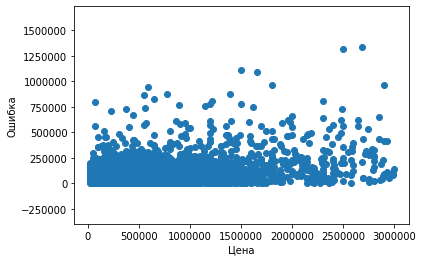

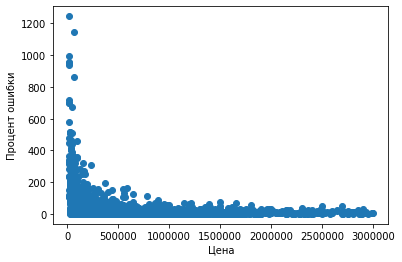

In [0]:
#Делаем маску - машины, с ценой до 3.000.000р
mask = y_train[n_val:] < 3e+6
x = y_train[n_val:] #Вытаскиваем все реальные цены
y = abs_delta #Вытаскиваем модули ошибки
yp = 100*abs_delta / y_train[n_val:] #Расчитываем процент ошибки

#Фильтруем по маске - только машины с ценой до 3млн
x = x[mask]
y = y[mask]
yp = yp[mask]

#Выводим 2d карту - ошибка от цены
plt.scatter(x, y)
plt.xlabel('Цена')
plt.ylabel('Ошибка')
plt.axis('equal')
plt.show()

#Выводим 2d карту - процент ошибки от цены
plt.scatter(x, yp)
plt.xlabel('Цена')
plt.ylabel('Процент ошибки')
plt.show()